2) 회귀분석2(주택가격 데이터셋)

주택 가격 예측: 회귀분석

회귀분석 : 연속적인 값을 예측

예) 과거 기상 데이터를 입력하여 내일의 기온을 예측

보스턴 주택 가격 데이터셋

1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로

    주택 가격 예측

샘플 개수 : 506개(학습용 404개, 검증용 102개)

In [65]:
from keras.datasets import boston_housing

# c:/사용자/본인계정/.keras/datasets 디렉토리에 다운로드됨

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [66]:
#학습용 404개, 검증용 102개, 13개의 변수

print(X_train.shape)

print(X_train.shape[1])

(404, 13)
13


In [67]:
X_test.shape

(102, 13)

In [68]:
# 독립 변수 목록

# 1. Per capita crime rate.

# 2. Proportion of residential land zoned for lots over 25,000

#    square feet.

# 3. Proportion of non-retail business acres per town.

# 4. Charles River dummy variable (= 1 if tract bounds river;

#    0 otherwise).

# 5. Nitric oxides concentration (parts per 10 million).

# 6. Average number of rooms per dwelling.

# 7. Proportion of owner-occupied units built prior to 1940.

# 8. Weighted distances to five Boston employment centres.

# 9. Index of accessibility to radial highways.

# 10. Full-value property-tax rate per $10,000.

# 11. Pupil-teacher ratio by town.

# 12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of

#     Black people by town.

# 13. % lower status of the population.

# 종속변수 : 주택의 가격(천달러 단위)

#주택가격(10000~50000달러, 1970년대 중반 가격)

y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

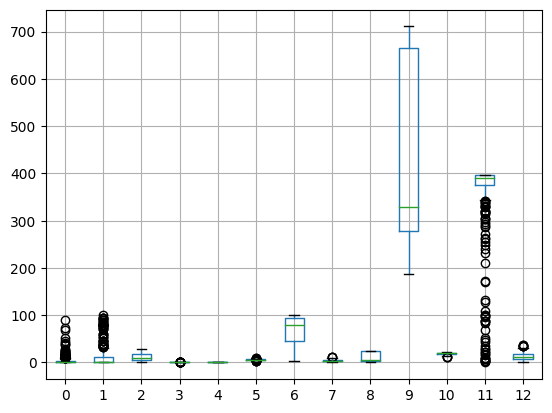

In [69]:
import pandas as pd

import matplotlib.pyplot as plt

pd.DataFrame(X_train).boxplot()

plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)

X_test_scaled=scaler.transform(X_test)

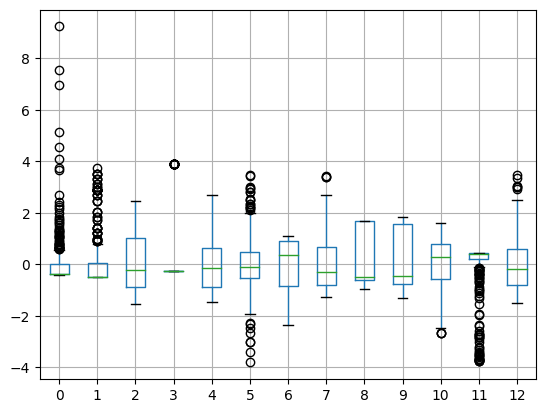

In [71]:
pd.DataFrame(X_train_scaled).boxplot()

plt.show()

In [72]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어내는 함수

# input data -> {activation function} -> output data

# 활성화 함수의 종류 : 탄젠트(thanh) 함수, 시그모이드(sigmoid) 함수,

#    ReLU 함수

# 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서

#    최근에는 ReLU(Rectified Linear Unit)가 많이 사용되고 있음

from keras import models, layers

#64개의 노드를 가진 은닉층 2개의 신경망

def build_model():

    model = models.Sequential()

    #relu

    model.add(layers.Dense(64, activation='relu',

                           input_shape=(X_train.shape[1],)))

    model.add(layers.Dense(64, activation='relu'))

    #출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우

    #   활성화 함수가 없는 선형층을 사용함)

    model.add(layers.Dense(1))

    #mse 손실 함수를 사용하여 컴파일

    #mse : 평균 제곱 오차(mean squared error) -

    #  예측값과 실제값의 거리의 제곱

    #mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값

    #metrics 평가지표, 검증용 데이터셋으로 평가하는 기준

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model



model = build_model()

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


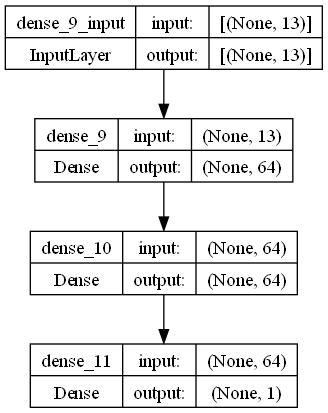

In [73]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [74]:
import matplotlib.pyplot as plt

import numpy as np

def train(x_train, y_train, epochs=21):

    for epoch in np.arange(1, epochs):

      hist=model.fit(x_train, y_train)

      plt.plot(y_train, c='r', label='real')

      plt.plot(model.predict(x_train), c='b', label='pred')

      plt.legend()

      mae = hist.history['mae'][0]

      plt.title(f"Epoch {epoch:02d}, mae {mae:.2f}")

      plt.savefig(f"img/plot_{epoch:02d}.png")

      plt.clf()

In [75]:
train(X_train_scaled,y_train)

13/13 [==============================] - 0s 2ms/step


In [76]:
import cv2
import glob

img_array=[]

size=(0,0)

for filename in  sorted(glob.glob('img/*.png')):

    img=cv2.imread(filename)

    height,width,layers=img.shape

    size=(width,height)

    img_array.append(img)

out=cv2.VideoWriter('model.mp4', cv2.VideoWriter_fourcc(*'H264'), 0.5, size)

for i in range(len(img_array)):

    out.write(img_array[i])

out.release()

In [77]:
hist=model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 4ms/step - loss: 14.1192 - mae: 2.6244
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 13.8699 - mae: 2.5991
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 13.6193 - mae: 2.6188
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 13.3851 - mae: 2.5837
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 13.0759 - mae: 2.5450
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 12.5407 - mae: 2.5067
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 12.5222 - mae: 2.4791
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 12.0795 - mae: 2.4424
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 11.9654 - mae: 2.4148
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 11.7249 - mae: 2.4688
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - los

In [78]:
# 검증용 데이터로 모델 평가

mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)

print(mse)

print(mae) 

4/4 [==============================] - 0s 3ms/step - loss: 18.6950 - mae: 2.7724
18.694961547851562
2.7724127769470215


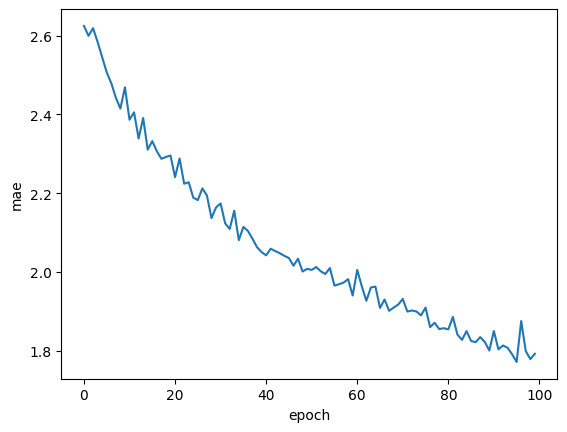

In [79]:
plt.plot(hist.history["mae"])

plt.ylabel("mae")

plt.xlabel("epoch")

plt.show()